# Laden des Datensets - Fahrrad und DB

In der Jupyter-Datei "download_twitter_data.ipynb" werden einzelne Pickle-Dateien zum Thema Fahrrad und Bahn erstellt. Dieses Jupyter-Notebook wurde seit dem 01.05.2022 jede Woche ausgeführt. Die einzelnen Pickle-Dateien mit den gefundenen Tweets müssen nun zu einem Datenset zusammengeführt werden.

## Vorgehensweise

Zunächst müssen die hierfür benötigten Bibliotheken importiert werden.

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

Danach werden die vorhandenen Dateien in dem Ordner "Tweets" in einer großen Liste "files" gespeichert.

In [2]:
files = [f for f in listdir('Tweets') if isfile(join('Tweets', f))]

Um aus diesen Listenelementen ein großes Datenset zu kreieren, werden sie zu einem DataFrame konkatiniert.

In [3]:
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_pickle('Tweets/'+Tweets/'+filefile)]) # TODO change file path for windows

Um einen groben Überblick über das erstellte Datenset zu bekommen, wird es an dieser Stelle ausgegeben.

In [4]:
df

,author_id,conversation_id,lang,text,created_at,context_annotations,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,attachments.media_keys,referenced_tweets,in_reply_to_user_id,query,geo.place_id,attachments.poll_ids,geo.coordinates.type,geo.coordinates.coordinates
0,1234124014035054594,1537364144084635649,de,Digga kein Bock mehr auf #9EuroTicket\nDie da ...,2022-06-16T09:19:09.000Z,"[{'domain': {'id': '156', 'name': 'Cities', 'd...",1537364144084635649,0,0,3,0,[3_1537364134051909632],NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN
1,1356948542431121408,1536633068617977858,de,RT @RolandRides: Fahrrad im Zug in Bayern: Ab ...,2022-06-14T08:54:07.000Z,NaN,1536633068617977858,1,0,0,0,NaN,"[{'type': 'retweeted', 'id': '1536460345782550...",NaN,regio Fahrrad,NaN,NaN,NaN,NaN
2,1209952147,1536460345782550533,de,Fahrrad im Zug in Bayern: Ab Dezember verliert...,2022-06-13T21:27:47.000Z,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",1536460345782550533,1,3,10,0,NaN,NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN
3,1725783535,1536005173029502978,de,@janxgeist @Kulf @jmbeuter @frank_reddy @DB_Ba...,2022-06-13T13:22:38.000Z,NaN,1536338254970093568,0,2,4,0,NaN,"[{'type': 'replied_to', 'id': '153632680932695...",210212248,regio Fahrrad,NaN,NaN,NaN,NaN
4,1438170151648731138,1536308544152150017,de,@DerKreisch Junge bin gerade nur mit der Regio...,2022-06-13T11:30:22.000Z,NaN,1536310002390016000,0,2,2,0,NaN,"[{'type': 'replied_to', 'id': '153630974745604...",1119835220,regio Fahrrad,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,44665795,1525659265985290240,en,We hope your weekend looks and feels just like...,2022-05-15T02:08:09.000Z,"[{'domain': {'id': '6', 'name': 'Sports Event'...",1525659265985290240,2,0,2,0,[3_1525659263326212096],NaN,NaN,RE Mountainbike,NaN,NaN,NaN,NaN
3,1282001810144792578,1524150535431102465,en,RT @OutbackMTB: When you're too fast for reali...,2022-05-10T22:12:59.000Z,"[{'domain': {'id': '66', 'name': 'Interests an...",1524150535431102465,1,0,0,0,NaN,"[{'type': 'retweeted', 'id': '1524118372694253...",NaN,RE Mountainbike,NaN,NaN,NaN,NaN
4,1287460950468165632,1524118372694253570,en,When you're too fast for reality 😎\nFollow ➡️ ...,2022-05-10T20:05:11.000Z,"[{'domain': {'id': '66', 'name': 'Interests an...",1524118372694253570,1,0,6,0,[7_1524118333813104643],NaN,NaN,RE Mountainbike,NaN,NaN,NaN,NaN
5,1331751832750678016,1523454069712449542,en,Wondering if you’re addicted to mountain bikin...,2022-05-09T00:05:29.000Z,"[{'domain': {'id': '66', 'name': 'Interests an...",1523454069712449542,0,0,0,1,NaN,NaN,NaN,RE Mountainbike,NaN,NaN,NaN,NaN


Um einen Eindruck für die einzelnen Tweets zu bekommen und ihre Gewichtung zu erkennen, wird die maximale Anzahl des Retweet Counts, des Reply Counts, des Like Counts und der Quote Counts betrachtet. Die entstehende Tabelle wird auf die ID des Accounts gruppiert und gibt außerdem in der Spalte "query" die Synonym-Paar Kombinationen, erstellt in der Jupyter-Datei "download_twitter_data.ipynb", an, in denen die Tweets des Accounts fallen.

In [5]:
df_tmp = df[['id', 'created_at', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count','query']]
df_tmp = pd.merge(df_tmp.groupby('id').agg({'public_metrics.retweet_count': 'max', 
                          'public_metrics.reply_count': 'max', 
                          'public_metrics.like_count': 'max', 
                          'public_metrics.quote_count': 'max'}),
         df_tmp.groupby('id')['query'].apply(list),
         on='id', how='inner')


In [6]:
df_tmp

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
id,,,,,
1518193757107240960,0,1,2,0,[Tram bike]
1518198704490037249,2,0,0,0,[ICE rad]
1518198853580767232,6,0,0,0,[Zug Fahrrad]
1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...
1545709353759563779,0,0,2,0,"[bahn Fahrrad, bahn rad, ÖPNV Fahrrad, ÖPNV rad]"
1545709638410272769,0,0,0,0,[Bus bike]
1545709790877319170,3,0,0,0,[Bus bike]


In [7]:
df_tmp.reset_index()

,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
0,1518193757107240960,0,1,2,0,[Tram bike]
1,1518198704490037249,2,0,0,0,[ICE rad]
2,1518198853580767232,6,0,0,0,[Zug Fahrrad]
3,1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
4,1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...,...
18838,1545709353759563779,0,0,2,0,"[bahn Fahrrad, bahn rad, ÖPNV Fahrrad, ÖPNV rad]"
18839,1545709638410272769,0,0,0,0,[Bus bike]
18840,1545709790877319170,3,0,0,0,[Bus bike]
18841,1545710112010027014,0,0,1,0,[RE bike]


Um die Daten übersichtlicher zu machen und sie zur Datenanalyse vorzubereiten müssen ein paar Veränderungen an dem Datenset vorgenommen werden. Zunächst werden Dopplungen der Tweets herausgenommen, und Zeilen miot nicht vorhandenen Werte heausgenommen. 
Danach wird eine Spalte "is_retweet" erstellt, die die Information über Tweet mithilfe dem Wert 0 (nicht retweeetd) oder 1 (retweeted) erweitert.
Die Spalte "created_at_day" gibt das Erstellungsdatum des Tweets in der Form YYYY-MM-DD an, wobei diese Information eine Verkürzung der zu findenen Information in Spatle "created_at" darstellt.

In [8]:
df = pd.merge(df[['text', 'id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count',             
             'lang',
             'created_at', 
             'conversation_id', 
             'author_id', 
            ]].drop_duplicates(), 
         df_tmp.reset_index(),
         on=['id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count'], 
         how='right').dropna()
df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)
df['created_at_day'] = df['created_at'].apply(lambda x: x[:10])
df['created_at_day'] = pd.to_datetime(df['created_at_day']).dt.date

<ipython-input-8-03000e42776a>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)


In [9]:
df[(df['public_metrics.retweet_count'] > 0) & (df['public_metrics.retweet_count'] < 5)]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
21,RT @lowercayce: I have even more love for all ...,1518235889167593472,2,0,0,0,en,2022-04-24T14:30:18.000Z,1518235889167593472,701502940566069248,[ICE rad],1,2022-04-24
23,#PSA our recent data collection project shows ...,1518236320149106688,1,0,0,0,en,2022-04-24T14:32:00.000Z,1518236320149106688,1434023642447286273,[RE ebike],0,2022-04-24
29,RT @BeautyHealthHip: One Of Best Exercise Bike...,1518245037850697730,1,0,0,0,en,2022-04-24T15:06:39.000Z,1518245037850697730,4077758069,[IC bike],1,2022-04-24
30,RT @epowersportllc: #PSA our recent data colle...,1518247878774431744,1,0,0,0,en,2022-04-24T15:17:56.000Z,1518247878774431744,2369054990,[RE ebike],1,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18810,"@taybridge Might as well make it an ebike, whi...",1545701717781745665,1,1,3,0,en,2022-07-09T09:29:41.000Z,1545216954922835968,1416727932760952838,[RE ebike],0,2022-07-09
18813,"RT @SummerGirlsNFT: We’re a free mint, gas is ...",1545702588619771904,4,0,0,0,en,2022-07-09T09:33:09.000Z,1545702588619771904,1532947164728815617,[RE rad],1,2022-07-09
18819,RT @Omo19910: Now that I’ve finished what God ...,1545704861945237505,3,0,0,0,en,2022-07-09T09:42:11.000Z,1545704861945237505,189498074,[Bus bike],1,2022-07-09
18821,RT @CoolBikeArt1: @taybridge Might as well mak...,1545705023098732544,1,0,0,0,en,2022-07-09T09:42:49.000Z,1545705023098732544,3205704843,[RE ebike],1,2022-07-09


In [10]:
df[df.lang=='de']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad],1,2022-04-24
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad],1,2022-04-24
6,@radkolumne Seit nun 2 Monaten: Bahn Bus Tram...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,2791876688,[Tram Fahrrad],0,2022-04-24
7,@radkolumne Hab mir gestern extra noch ein geb...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,1108457893555326978,[Zug rad],0,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,@rad_ritter @bvbnet Schon die Haltestelle von ...,1545707014428524544,0,0,1,0,de,2022-07-09T09:50:44.000Z,1545326186418651137,233492426,[Bus rad],0,2022-07-09
18831,@bekommenix @tweetbarth Ist bei mir ähnlich. S...,1545707062092615683,0,0,0,0,de,2022-07-09T09:50:56.000Z,1544347105665454080,87310060,[ÖPNV Fahrrad],0,2022-07-09
18833,@thom_bike_bln @BerlinCyclist @ZEITvst @emilia...,1545707426074296320,0,1,0,0,de,2022-07-09T09:52:22.000Z,1544311268370178049,166730910,"[Bus rad, Bus bike]",0,2022-07-09
18834,RT @ADFCBayern: Umfrage: Fahrrad und ÖPNV Raum...,1545707570119196676,7,0,0,0,de,2022-07-09T09:52:57.000Z,1545707570119196676,722779258175819776,[ÖPNV Fahrrad],1,2022-07-09


Im Weiteren werden nur Daten betrachtet, die kein Retweet sind (da die Informationen sich inhaltlich bei diesen Tweets nicht von ihrem Original-Tweet unterscheiden) und in der Sprache Deutsch verfasst wurden.

In [11]:
df_selected = df[(df.is_retweet == 0) & (df.lang=='de')]

Um einen groben Überblick über die Verteilung der Likes zu bekommen, wird hier ein Histogramm gezeichnet.

In [12]:
# Importsimport matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df_selected[df_selected['public_metrics.like_count']<101], x="public_metrics.like_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Verteilung der Likes')
fig.show()

Um einen weiteren Eindruck zu bekommen, welche Wörter in den Tweets am häufigsten benutzt worden sind, wird eine WordCloud zur Hilfe genommen. Ein Tutorial hierzu findet man unter anderem hier: https://pythonspot.com/nltk-stop-words/ (Abgerufen: 18.07.2022)

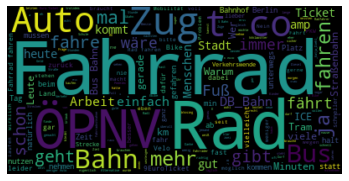

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df_selected[df_selected.lang=='de'].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [14]:
print('Dataset size: ', len(df_selected))

Dataset size:  5757


Hier ein Beipsiel-Code um in die Tweets des Datensatzes zu schauen:

In [2]:
df[df.lang=='de'][['text','public_metrics.like_count']].sort_values(by='public_metrics.like_count', ascending=False)['text'].iloc[9]

NameError: name 'df' is not defined

Um mit den Likes auf den Tweets weiterzuarbeiten, werden die Tweets mit iheren zugehörigen Likes im folgenden in einer CSV-Datei "test.csv" gespeichert.

In [16]:
df[df.lang=='de'].sort_values(by='public_metrics.like_count', ascending=False).text.to_csv('test.csv')

Nun werden die Tweets weiter gefiltert, indem nach einem 9 Euro Kontext gesucht wird. Die grobe Idee ist es herauzufinden, wie viele Tweets sich mit dem Kontext 9 Euro identifizieren lassen. Auch hier mussten Synonyme für 9 Euro gefunden werden, damit ein großer Teil der verschiedenen Schreibweisen abgedeckt werden kann.

In [17]:
neun_euro = ['9€', '9 €', '9-€', '9 euro', '9-euro', '9euro', 'neuneuro', 'neun euro', 'neun-euro']

df_neun_euro = pd.DataFrame()
neun_euro_indices = list()

for search_text in neun_euro:
    df_tmp = df_selected[df_selected['text'].str.lower().str.contains(search_text, regex=True)]
    neun_euro_indices += list(df_tmp.index)
    
df_neun_euro['index'] = neun_euro_indices
df_neun_euro = pd.merge(df_selected, df_neun_euro.drop_duplicates(), left_index=True, right_on='index')
df_neun_euro



,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,index
99,Seit Jahren sagen alle fahrt mehr Bahn. Bahn z...,1519322877279014913,0,1,1,0,de,2022-04-27T14:29:36.000Z,1519322877279014913,712341219716833280,[bahn rad],0,2022-04-27,468
100,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28,576
120,Werdet Ihr das 9 Euro-Ticket nutzen? \n\nIch ü...,1519674350437285888,0,9,24,0,de,2022-04-28T13:46:13.000Z,1519674350437285888,786118815012704256,[bahn rad],0,2022-04-28,678
208,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29,807
209,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29,849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,@DrClownerie #özdemir wäre sicher mit dem Rad ...,1545646152837627904,0,1,0,0,de,2022-07-09T05:48:54.000Z,1545630517969690631,1235158494287998979,[bahn rad],0,2022-07-09,18613
344,#Fahrräder in den Zug wuchten und wieder auf d...,1545647308070703104,7,5,17,0,de,2022-07-09T05:53:29.000Z,1545647308070703104,2320447884,"[Zug Fahrrad, Zug rad, bahn Fahrrad, bahn rad]",0,2022-07-09,18616
119,@eurowelder Immer vorher vergleichen (lassen):...,1545659357605625856,0,0,2,0,de,2022-07-09T06:41:22.000Z,1545306855500562433,1323838054004592641,[ÖPNV Fahrrad],0,2022-07-09,18651
345,@AntonRauch @ADFCBayern @BauenBewegen @BR24 vo...,1545679934173102081,0,0,1,0,de,2022-07-09T08:03:08.000Z,1545647308070703104,743748937580851200,[bahn Fahrrad],0,2022-07-09,18728


Eine weitere Spalte "neun_euro_context" wird dem Datenset hinzugefügt, um später eine Übersicht über die Häufigkeit der Vorkommnisse des Kontexts 9 Euro in den Tweets erstellen zu können. 

In [18]:
df_selected['neun_euro_context'] = df_selected.index.isin(neun_euro_indices)

<ipython-input-18-36f7e4f6ff54>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Nun betrachten wir die Anzahl an erstellten Tweets über unseren aufgenommenen Zeitpunkt. Die x-Achse repräsentiert dabei die Zeit nach Tagen und die y-Achse die Anzahl der Tweets. Es ist erwähnenswert, dass die 9 Euro Kontext-Tweets nur einen sehr kleinen Teil des gesamten Datensets ausmachen. Sie machen nicht mehr als ca. 12% des Datensets aus.

<AxesSubplot:xlabel='index'>

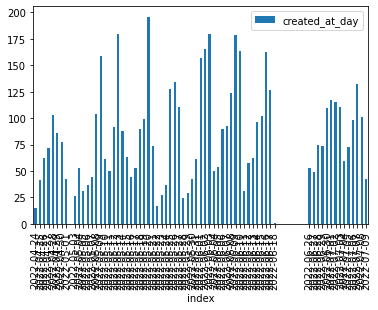

In [19]:
df_selected['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day')

<AxesSubplot:xlabel='index'>

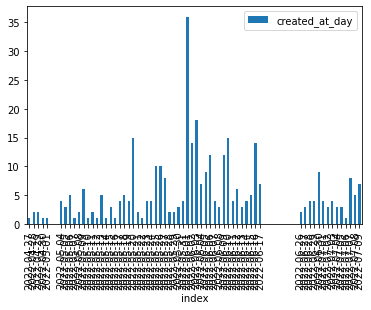

In [20]:
df_neun_euro['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day')

Hier suchen wir nach dem Hashtag "#9EuroTicket", um ein Gefühl für die Nutzung des Hashtatgs zu bekommen.

In [21]:
df_selected[df_selected['text'].str.lower().str.contains('9euroticket', regex=True)]#['text'].to_csv('test.csv')

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,neun_euro_context
807,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29,True
849,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29,True
1626,@kkklawitter Das habe ich vor! Auch wenn ich e...,1520691597293273089,0,4,19,1,de,2022-05-01T09:08:24.000Z,1520688962519670784,1084516215970824192,[ÖPNV rad],0,2022-05-01,True
1848,@PRO_BAHN möchte lt. einem Bericht im @spiegel...,1521740669307478020,0,0,2,0,de,2022-05-04T06:37:02.000Z,1521740669307478020,1632345828,"[Zug Fahrrad, Zug rad]",0,2022-05-04,True
1891,"#9EuroTicket #sylt Schatz, da kommt keiner dra...",1521862507874377728,0,0,1,0,de,2022-05-04T14:41:11.000Z,1521862507874377728,755346315173826560,[bahn bike],0,2022-05-04,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,Die App der TU München zur #9EuroTicket-Studie...,1545086804545732610,0,0,4,0,de,2022-07-07T16:46:15.000Z,1543190901186600960,1242079897,"[Straßenbahn Fahrrad, Straßenbahn Radl]",0,2022-07-07,True
18088,Unsere Reporterin hat das Auto in den letzten ...,1545289879109730304,2,7,13,0,de,2022-07-08T06:13:11.000Z,1545289879109730304,19811643,"[Bus Fahrrad, bahn Fahrrad]",0,2022-07-08,True
18613,@DrClownerie #özdemir wäre sicher mit dem Rad ...,1545646152837627904,0,1,0,0,de,2022-07-09T05:48:54.000Z,1545630517969690631,1235158494287998979,[bahn rad],0,2022-07-09,True
18616,#Fahrräder in den Zug wuchten und wieder auf d...,1545647308070703104,7,5,17,0,de,2022-07-09T05:53:29.000Z,1545647308070703104,2320447884,"[Zug Fahrrad, Zug rad, bahn Fahrrad, bahn rad]",0,2022-07-09,True


Um weitere relevante Hashtags zu finden, erstellen wir eine Liste an Hashtags, bzw. Wörtern, die mit einem "#" beginnen.

In [22]:
df_tmp = pd.DataFrame()
df_tmp['hastag_list'] = df_selected.text.str.findall(r'#.*?(?=\s|$)')
df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
df_tmp = df_tmp[df_tmp.number_hastags != 0]
hashtags = list()
for i, row in df_tmp.iterrows():
    hashtags += row['hastag_list']

Höchste Zahl in einem Hashtag?

In [3]:
import string
from collections import Counter
hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
{k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1])}


NameError: name 'hashtags' is not defined

Um eine weitere Spezialisierung zum Thema Fahrrad und Bahn zu erhalten, versuchen wir in den Tweets das Wort "Preis" ausfindig zu machen. Diese Spezialisierung wird jedoch wieder, aufgrund weniger Vorkommnisse, verworfen.

In [24]:
df_selected[df_selected.text.str.contains('preis')]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,neun_euro_context
55,@ChrischmiDE @Reiner_Kolberg @FahrradClub Vorb...,1518297164576923648,0,0,1,0,de,2022-04-24T18:33:47.000Z,1518224733023752192,1295504335120617472,[Straßenbahn rad],0,2022-04-24,False
576,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28,True
895,@Aliverable @vecci2000 @DashcamLeipzig Mich kö...,1519996563975819264,0,0,0,0,de,2022-04-29T11:06:35.000Z,1519049499930505216,177920327,[ÖPNV rad],0,2022-04-29,False
1333,@PTNisWarCrmnl @kkklawitter @FridaysBad Wie wo...,1520503532889202689,0,0,1,0,de,2022-04-30T20:41:06.000Z,1511282321122545668,1169892501282406400,[bahn rad],0,2022-04-30,False
2277,#Putin und #Automobil-Konzerne hassen diesen T...,1522875501303549952,0,1,3,0,de,2022-05-07T09:46:27.000Z,1522875501303549952,3183235300,[Bus rad],0,2022-05-07,False
2459,@ChristianDaheim @cycling_ann @WDR Darum ging ...,1523232623518437377,0,1,3,0,de,2022-05-08T09:25:32.000Z,1522992645832048640,2951598761,[Bus rad],0,2022-05-08,False
4244,@LukasIlgner Da wir demnächst alle elektrisch ...,1525043000686039041,0,3,0,0,de,2022-05-13T09:19:19.000Z,1524727120236318723,21096650,[ÖPNV rad],0,2022-05-13,False
4612,@Perowinger94 @AKress84 Den Normalpreis finde ...,1525392482804109312,0,1,3,0,de,2022-05-14T08:28:02.000Z,1525373661120802816,1044486967101206528,[bahn rad],0,2022-05-14,False
5635,#Spritpreisbremse ist gut für:\n- #Putin\n- Re...,1526943699380457474,1,0,3,0,de,2022-05-18T15:12:01.000Z,1526943699380457474,1191819239990190080,[ÖPNV rad],0,2022-05-18,False
5864,@a_sator @martin_blum Recht einseitige Betrach...,1527291684861648896,0,0,0,0,de,2022-05-19T14:14:48.000Z,1526918857386082304,2515182600,[ÖPNV rad],0,2022-05-19,False


Um das Datenset weiter zu bereinigen werden Links und @-Erwähnungen aus den Texten der Tweets herausgenommen.

In [25]:
df_selected['text_altered'] = df_selected.text.str.replace(r'http\S+', '', regex=True)
df_selected['text_altered'] = df_selected.text_altered.str.replace(r'@\S+', '', regex=True)

<ipython-input-25-682e876f37f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-682e876f37f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Sentimentanalyse

Warum nutzen wir dieses Modell?

@InProceedings{guhr-EtAl:2020:LREC,
  author    = {Guhr, Oliver  and  Schumann, Anne-Kathrin  and  Bahrmann, Frank  and  Böhme, Hans Joachim},
  title     = {Training a Broad-Coverage German Sentiment Classification Model for Dialog Systems},
  booktitle      = {Proceedings of The 12th Language Resources and Evaluation Conference},
  month          = {May},
  year           = {2020},
  address        = {Marseille, France},
  publisher      = {European Language Resources Association},
  pages     = {1620--1625},
  url       = {https://www.aclweb.org/anthology/2020.lrec-1.202}
}

(Abgerufen: 18.07.2022 -> so möchten die Autoren zitiert werden, wenn ihr Modell verwendet wird)

Hier eine Erklärung wie man ihr Modell anwenden kann: https://huggingface.co/oliverguhr/german-sentiment-bert (Abgerufen: 18.07.2022)


@InProceedings{guhr-EtAl:2020:LREC,
  author    = {Guhr, Oliver  and  Schumann, Anne-Kathrin  and  Bahrmann, Frank  and  BÃ¶hme, Hans Joachim},
  title     = {Training a Broad-Coverage German Sentiment Classification Model for Dialog Systems},
  booktitle      = {Proceedings of The 12th Language Resources and Evaluation Conference},
  month          = {May},
  year           = {2020},
  address        = {Marseille, France},
  publisher      = {European Language Resources Association},
  pages     = {1627--1632},
  abstract  = {This paper describes the training of a general-purpose German sentiment classification model. Sentiment classification is an important aspect of general text analytics. Furthermore, it plays a vital role in dialogue systems and voice interfaces that depend on the ability of the system to pick up and understand emotional signals from user utterances. The presented study outlines how we have collected a new German sentiment corpus and then combined this corpus with existing resources to train a broad-coverage German sentiment model. The resulting data set contains 5.4 million labelled samples. We have used the data to train both, a simple convolutional and a transformer-based classification model and compared the results achieved on various training configurations. The model and the data set will be published along with this paper.},
  url       = {https://www.aclweb.org/anthology/2020.lrec-1.202}
} 

(Abgerufen: 18.07.2022 -> hier der zugehörige Artikel, der tatsächlich unter den Seiten 1627-1632 zu finden ist)

In [26]:
from germansentiment import SentimentModel

model = SentimentModel()

#texts = [
#    "Mit keinem guten Ergebniss","Das ist gar nicht mal so gut",
#    "Total awesome!","nicht so schlecht wie erwartet",
#    "Der Test verlief positiv.","Sie fährt ein grünes Auto."]
       
#result = model.predict_sentiment(texts)
#print(result)

#Output positive, negative, neutral

In [27]:
import germansentiment
import os
path = os.path.dirname(germansentiment.__file__)

In [28]:
path

'/home/egon/.local/lib/python3.8/site-packages/germansentiment'

In [30]:
sentiment_categories = list()
sentiment_values = list()
text_list = list(df_selected['text_altered'])
#df_selected['text_altered']
sentiments = list()
step_size = 100
number_of_texts = len(text_list)
#TODO Das Ende passt nicht
for i in range(step_size,(number_of_texts+step_size),step_size):
    print((i-step_size),i)
    tmp_list = model.predict_sentiment(text_list[(i-step_size):i])
    sentiment_categories += tmp_list[0]
    sentiment_values += tmp_list[1]

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
1000 1100
1100 1200
1200 1300
1300 1400
1400 1500
1500 1600
1600 1700
1700 1800
1800 1900
1900 2000
2000 2100
2100 2200
2200 2300
2300 2400
2400 2500
2500 2600
2600 2700
2700 2800
2800 2900
2900 3000
3000 3100
3100 3200
3200 3300
3300 3400
3400 3500
3500 3600
3600 3700
3700 3800
3800 3900
3900 4000
4000 4100
4100 4200
4200 4300
4300 4400
4400 4500
4500 4600
4600 4700
4700 4800
4800 4900
4900 5000
5000 5100
5100 5200
5200 5300
5300 5400
5400 5500
5500 5600
5600 5700
5700 5800


Die berechneten Sentiments werden in der Spalte "sentiments" dem Dataset hinzugefügt. Sie enhalten die Werte "positiv", "negativ" oder "neutral" und geben so die generelle Stimmung des Tweets an.

In [31]:
df_selected['sentiments'] = sentiment_categories
df_sentiment_values = pd.DataFrame.from_records(sentiment_values, columns=['positive', 'negative', 'neutral'])
#df = pd.merge(df_selected, df_sentiment_values, left_index=True, right_index=True)
df = pd.concat([df_selected.reset_index(),df_sentiment_values], axis=1)

<ipython-input-31-adc5c1133451>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_selected[['sentiments', 'text_altered']].to_csv('test.csv')

In [33]:
#df_selected = pd.merge(df_selected,pd.read_csv('test.csv'))

In [34]:
df_selected['created_at_week'] = pd.to_datetime(df_selected['created_at']).dt.week

<ipython-input-34-fce2d59dd1fd>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [35]:
df_selected.columns

Index(['text', 'id', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'lang', 'created_at', 'conversation_id',
       'author_id', 'query', 'is_retweet', 'created_at_day',
       'neun_euro_context', 'text_altered', 'sentiments', 'created_at_week'],
      dtype='object')

Wofür?

In [36]:
def pos_neg_neut_ratio(df):
    df_sentiments_week = pd.pivot_table(df[['sentiments', 'created_at_week', 'id']], 
                   #values='sentiments', 
                   index='sentiments',
                   columns=['created_at_week'], 
                   aggfunc='count', 
                   fill_value=0
                  )
    df_ratio_week = df_sentiments_week.iloc[[0,1,2], :].div(df_sentiments_week.iloc[[0,1,2], :].sum())
    return df_sentiments_week, df_ratio_week

In [37]:
df_sentiment_all_abs, df_sentiment_all_relat = pos_neg_neut_ratio(df_selected)
df_sentiment_nine_abs, df_sentiment_nine_relat = pos_neg_neut_ratio(df_selected[df_selected.neun_euro_context])
df_sentiment_not_nine_abs, df_sentiment_not_nine_relat = pos_neg_neut_ratio(df_selected[~df_selected.neun_euro_context])

Die Sentiments der einzelnen Tweets werden nun verwendet, um Histogramme zu erzeugen. Die drei Histogramme machen deutlich, dass die Tweets mit Bezug auf das 9 Euro Ticket einen minimalen bis keinen Einfluss auf das generelle Stimmungsbild im Kontext Fahrrad und Bahn nehmen. Interessant ist zu beobachten, dass die neutralen Tweets im Bezug auf das 9 Euro Ticket im Aufkommen des Tickets abnehmen, aber nach Woche 26 wieder anfangen zuzunehmen und die Tweets zunehmend positiver werden, während die negativen Kommentare stark abfallen.

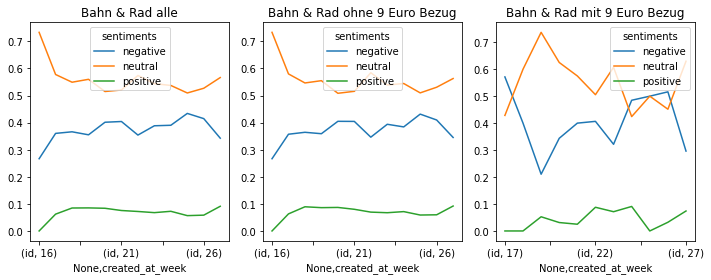

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
df_sentiment_all_relat.T.plot.line(ax=ax1, title='Bahn & Rad alle')
df_sentiment_not_nine_relat.T.plot.line(ax=ax2, title='Bahn & Rad ohne 9 Euro Bezug')
df_sentiment_nine_relat.T.plot.line(ax=ax3, title='Bahn & Rad mit 9 Euro Bezug')

plt.tight_layout()

<ipython-input-39-483d914b7c73>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



<AxesSubplot:xlabel='created_at_week'>

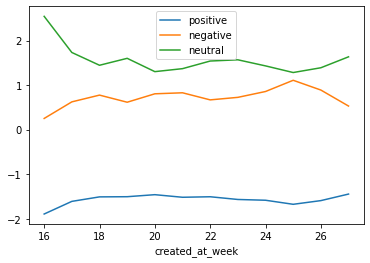

In [39]:
df['created_at_week'] = pd.to_datetime(df['created_at']).dt.week
df[['positive', 'negative', 'neutral']] = df[['positive', 'negative', 'neutral']].astype(float)
df[['created_at_week', 'positive', 'negative', 'neutral']].groupby('created_at_week').mean().plot.line()

In [54]:
df.to_pickle('dataset_sentimens.pckl')

In [41]:
    df_clustering = df[['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']]

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [43]:
X = df_clustering.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [44]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [45]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 1.7559287906081913
2 : 1.2746303735646234
3 : 1.2321905104467203
4 : 0.9973229773649126
5 : 0.9658968677341049
6 : 0.9552925572564684
7 : 0.9188424936533968
8 : 0.8754519226832312
9 : 0.7755503931400648


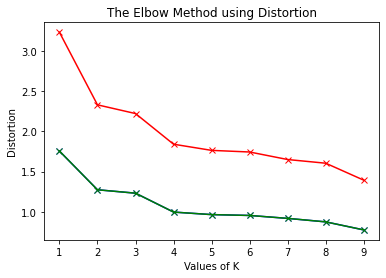

In [46]:
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [47]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 34541.99999999994
2 : 26197.948298229407
3 : 19572.679058198806
4 : 14845.182923825552
5 : 12573.171784334363
6 : 11017.356658662156
7 : 9862.86832100623
8 : 8952.751775988592
9 : 8024.174627347414


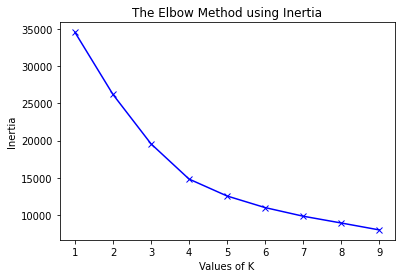

In [48]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


/home/egon/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [50]:
cluster_centers[0]

array([-0.01623993, -0.04210982, -0.03422796, -0.36348765, -0.7299933 ,
        0.79986026])

In [51]:
np.bincount(kmeans.labels_)

array([3002, 2254,  476,   25])

In [52]:
df_clustering['kmeans_label'] = kmeans.labels_

<ipython-input-52-c49a42bd6c6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
    df_clustering['neun_euro_context'] = df['neun_euro_context']
df_clustering.groupby('kmeans_label').mean().T

<ipython-input-53-897e6c726b2c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



kmeans_label,0,1,2,3
public_metrics.retweet_count,0.294470,0.179681,0.121849,22.480000
public_metrics.reply_count,0.770486,0.820763,0.735294,21.240000
public_metrics.quote_count,0.033644,0.028394,0.016807,3.520000
positive,-2.034184,-1.699498,2.432483,-1.846059
negative,-0.654717,2.848467,-0.500274,0.234128
neutral,3.866708,-0.939632,-1.843498,2.541142
neun_euro_context,0.063957,0.060781,0.046218,0.080000
